# Read data

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd

In [3]:
# read train.csv
train_df = pd.read_csv("dataset/train.csv")
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1039361,id2624835,2,2016-03-04 16:52:10,2016-03-04 17:04:32,1,-73.955544,40.776924,-73.981453,40.771091,N,742
730310,id0701423,2,2016-04-13 08:07:06,2016-04-13 08:22:41,5,-73.987831,40.770111,-73.950562,40.821602,N,935
1297084,id2036145,1,2016-02-23 16:01:02,2016-02-23 16:17:05,1,-73.974388,40.763588,-73.963043,40.778004,N,963
158209,id1478894,1,2016-06-17 19:41:41,2016-06-17 19:55:09,2,-73.988838,40.773918,-73.954826,40.777596,N,808
409821,id1835591,1,2016-05-11 13:05:03,2016-05-11 13:25:02,2,-73.968010,40.800041,-73.961693,40.799553,N,1199
166309,id0318795,2,2016-04-30 23:53:38,2016-04-30 23:58:18,1,-73.998955,40.728138,-73.996780,40.722084,N,280
941329,id3131545,1,2016-02-07 13:26:37,2016-02-07 13:37:36,1,-73.970497,40.783943,-73.973778,40.764523,N,659
70973,id1933049,2,2016-06-14 13:24:06,2016-06-14 13:30:32,1,-73.974663,40.742069,-73.970238,40.752258,N,386
1103763,id3255148,2,2016-01-27 13:08:36,2016-01-27 13:21:24,3,-73.963669,40.777245,-73.986740,40.762352,N,768
1373743,id0884254,1,2016-03-30 09:33:20,2016-03-30 09:49:53,1,-73.996849,40.762341,-74.015282,40.711075,N,993


In [4]:
# explore train.csv
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# preprocessing data

In [5]:
def preprocessing(data_df):
    # remove any rows with missing data
    data_df = data_df.dropna()

    # convert pickup and dropoff datetime to datetime format
    data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
    data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])

    # split datetime into month, day, week and hour
    data_df['day'] = data_df['pickup_datetime'].dt.day
    data_df['hour'] = data_df['pickup_datetime'].dt.hour
    data_df['month'] = data_df['pickup_datetime'].dt.month
    data_df['week'] = data_df['pickup_datetime'].dt.dayofweek
    return data_df


In [6]:
train_df = preprocessing(train_df)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,month,week
109722,id2009489,2,2016-02-05 13:04:09,2016-02-05 13:42:43,1,-74.003586,40.723717,-73.776459,40.646252,N,2314,5,13,2,4
779686,id3426567,2,2016-03-22 07:57:28,2016-03-22 08:01:05,5,-73.968338,40.762146,-73.972229,40.760792,N,217,22,7,3,1
549911,id2337547,1,2016-06-08 18:55:25,2016-06-08 19:04:55,1,-73.993576,40.747791,-73.998146,40.735416,N,570,8,18,6,2
507366,id0699389,1,2016-04-19 07:30:39,2016-04-19 07:53:38,1,-73.990341,40.771748,-74.014595,40.713928,N,1379,19,7,4,1
257466,id3796842,1,2016-01-01 16:00:39,2016-01-01 16:16:15,1,-73.862930,40.768845,-73.973091,40.743526,N,936,1,16,1,4
667716,id3515111,2,2016-03-23 23:04:37,2016-03-23 23:35:22,1,-73.870949,40.773739,-73.989822,40.593590,N,1845,23,23,3,2
517046,id0271854,2,2016-04-29 12:16:02,2016-04-29 12:30:39,1,-73.990120,40.747292,-73.978333,40.759701,N,877,29,12,4,4
440690,id1364506,1,2016-04-29 23:46:18,2016-04-29 23:51:59,2,-73.937698,40.804115,-73.948753,40.794697,N,341,29,23,4,4
1120063,id3589116,2,2016-01-18 15:57:28,2016-01-18 16:02:18,5,-74.008034,40.704903,-74.016670,40.707863,N,290,18,15,1,0
127414,id0857648,2,2016-01-19 08:03:06,2016-01-19 08:08:02,4,-73.982529,40.742790,-73.991417,40.744320,N,296,19,8,1,1


# data Analysis & visualization 

In [7]:


def categorical_histogram(data, column):
    categories = data[column].unique()
    num_categories = len(categories)
    colors = plt.cm.tab10(np.linspace(0, 1, num_categories))
    
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of '+column)
    plt.show()



def numerical_histogram(data, column):
    fig, axs = plt.subplots(1, 1, figsize=(16, 4))
    # the x axis should be not be in float format
    axs.xaxis.set_major_locator(MaxNLocator(integer=True))
    # split the histogram into 100 bins
    axs.hist(data[column], bins=100)

    
    axs.set_title('Histogram of '+column)
    axs.set_xlabel(column)
    axs.set_ylabel('Count')
    plt.show()
    
def numerical_histogram_columns(data, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(16, 4))
    for i in range(len(columns)):
        # split the histogram into 100 bins
        axs[i].hist(data[columns[i]], bins=100)
        #axs[i].hist(data[columns[i]])
        axs[i].set_title('Histogram of '+columns[i])
        axs[i].set_xlabel(columns[i])
        axs[i].set_ylabel('Count')
    plt.show()

def scatter_plot(data, x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter plot of '+x+' vs '+y)
    plt.show()


## vendor_id

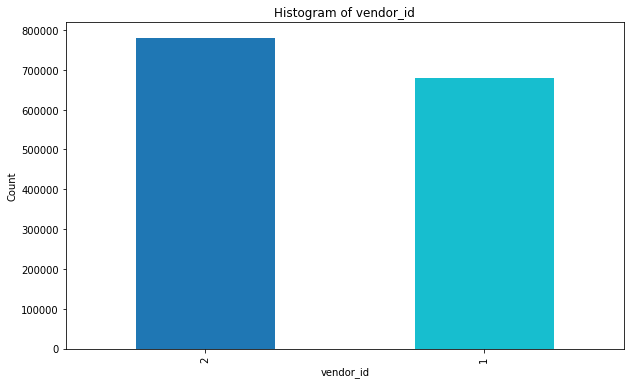

In [8]:
# plot histogram of vendor_id
categorical_histogram(train_df, "vendor_id")

* there are only two vendor_id in the data set, 1 and 2
* vendor_id 2 has more trips than vendor_id 1

## passenger_count

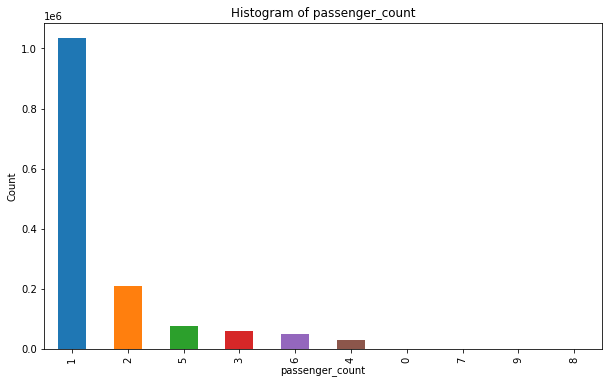

In [9]:
categorical_histogram(train_df, "passenger_count")

* Most of the trips have 1 or 2 passengers

## pickup day and pickup month

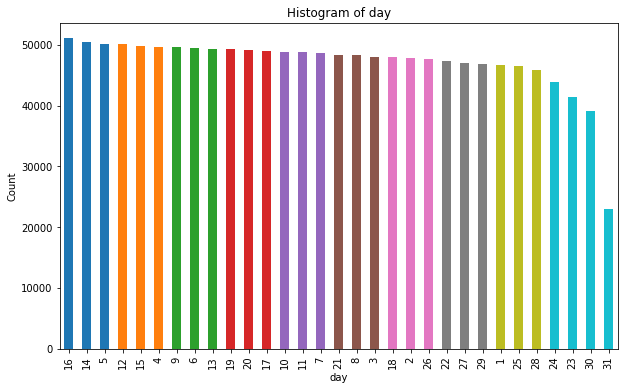

In [10]:
categorical_histogram(train_df, "day")

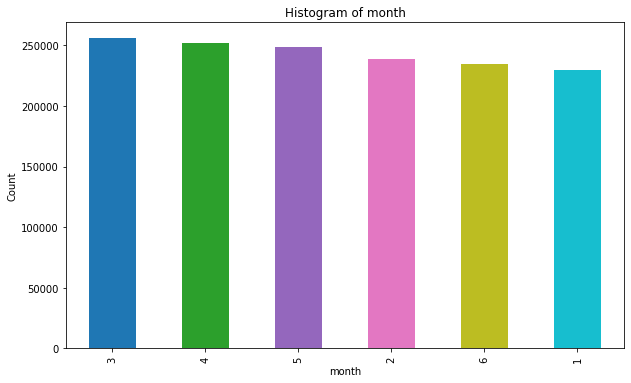

In [11]:
categorical_histogram(train_df, "month")

## pickup hour

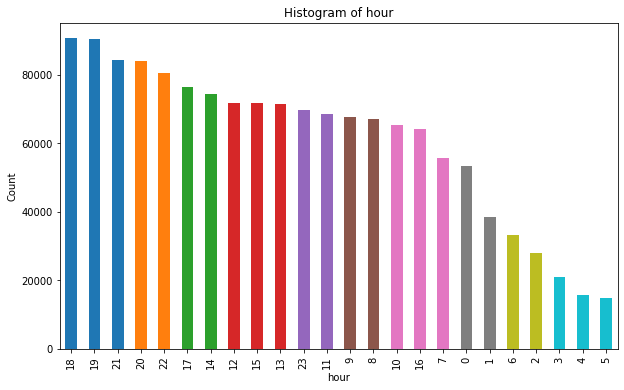

In [12]:
categorical_histogram(train_df, "hour")

* most hours of the day are 6,7 PM

## store_and_fwd_flag

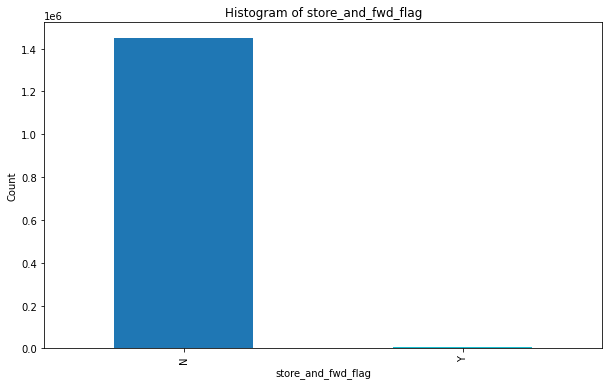

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [13]:
categorical_histogram(train_df, "store_and_fwd_flag")
train_df['store_and_fwd_flag'].value_counts()

* most of the trips are not stored and forwarded In other words, there was a direct connection between the vehicle and the server, allowing the trip data to be sent without the need for temporary storage.

## trip_duration

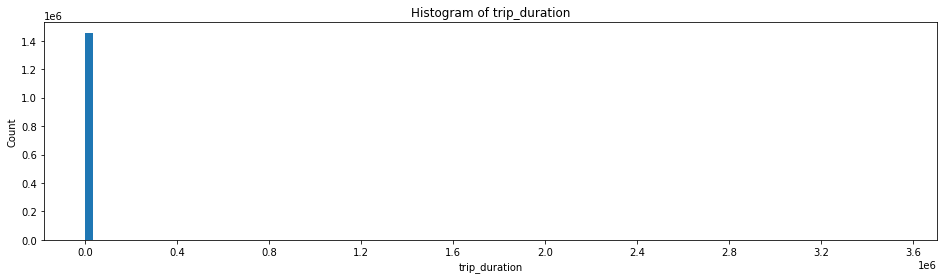

count    1458644.00
mean           0.27
std            1.45
min            0.00
25%            0.11
50%            0.18
75%            0.30
max          979.52
Name: trip_duration_hours, dtype: object

In [14]:
numerical_histogram(train_df, "trip_duration")
## train_df['trip_duration'].describe() but make float point to .2f and divide by 3600 to get hours
train_df['trip_duration_hours'] = train_df['trip_duration']/3600
train_df['trip_duration_hours'].describe().apply(lambda x: format(x, '.2f'))


## latitude and longitude

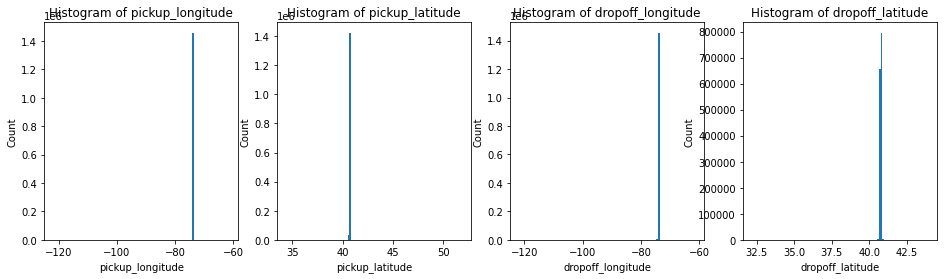

In [15]:
numerical_histogram_columns(train_df, ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

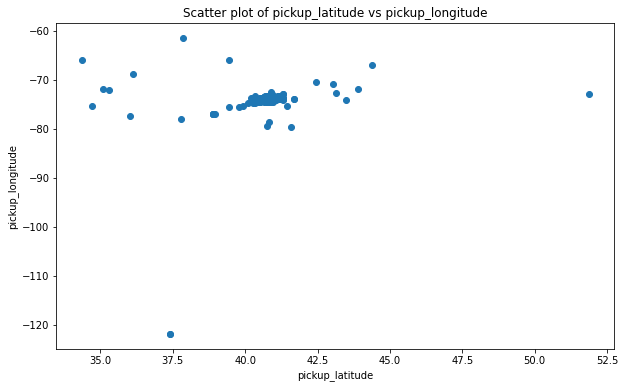

In [21]:
scatter_plot(train_df, "pickup_latitude", "pickup_longitude")

* some points are outside the main region of the data set so it is better to remove them (outliers)
* main region is between 37.5 and 45 for latitude and -65 and -80 for longitude

## correlation between trip_duration and other features

In [17]:
def plotCorrelation(train_df,col1,col2):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Scatter plot of '+col1+' vs '+col2)
    plt.show()

In [18]:
# correlation matrix
corr_matrix = train_df.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_12476/3367316845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


trip_duration_hours    1.000000
trip_duration          1.000000
pickup_longitude       0.026542
vendor_id              0.020304
dropoff_longitude      0.014678
passenger_count        0.008471
month                  0.006607
hour                   0.003690
day                    0.000566
week                  -0.000708
dropoff_latitude      -0.020677
pickup_latitude       -0.029204
Name: trip_duration, dtype: float64

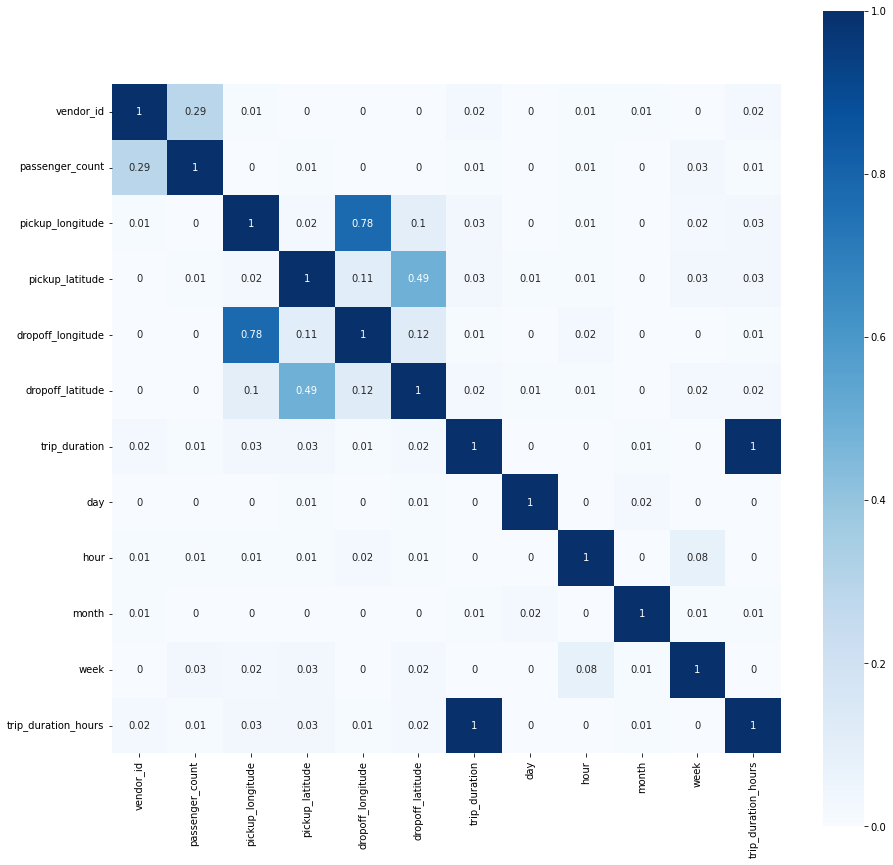

In [19]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(corr_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()

## plot the relationship between passenger_count and vendor_id

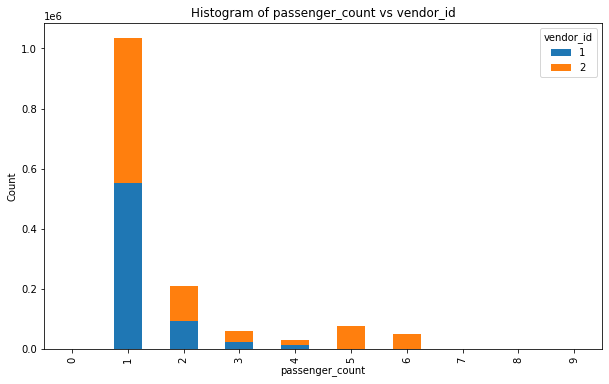

In [20]:
## plot the relationship between passenger_count and vendor_id
train_df.groupby(['passenger_count', 'vendor_id']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('passenger_count')
plt.ylabel('Count')
plt.title('Histogram of passenger_count vs vendor_id')
plt.show()
